In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

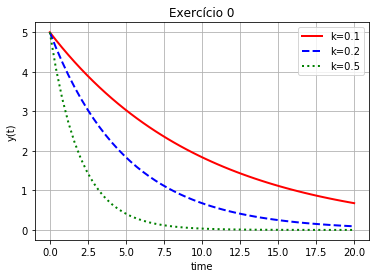

In [4]:
#return dy/dt
def model(y,t,k):
    dydt = -k * y
    return dydt

#initial condition
y0 = 5;

#time
t = np.linspace(0,20,50)

#solve
y1 = odeint(model, y0, t, args=(0.1,))
y2 = odeint(model, y0, t, args=(0.2,))
y3 = odeint(model, y0, t, args=(0.5,))

#plot results
plt.plot(t,y1,'r-', linewidth=2, label='k=0.1')
plt.plot(t,y2,'b--', linewidth=2, label='k=0.2')
plt.plot(t,y3,'g:', linewidth=2, label='k=0.5')
plt.grid()
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.title('Exercício 0')
plt.show()

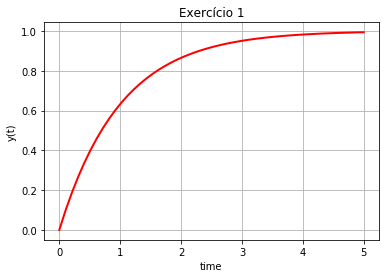

In [5]:
#return dy/dt
def model(y,t,a,b):
    dydt = a*y + b
    return dydt

#initial condition
y0 = 0;

#time
t = np.linspace(0,5)

#solve
y = odeint(model, y0, t, args=(-1,1,))

#plot results
plt.plot(t,y,'r-', linewidth=2)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.title('Exercício 1')
plt.grid()
plt.show()

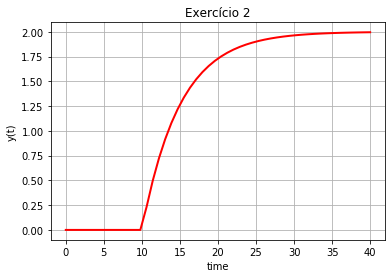

In [16]:
#return dy/dt

def step(t):
    if(t<10):
        return 0.0
    else:
        return 1.0
    
def model(y,t):
    u = step(t)*2
    
    dydt = (-y + u)/5
    return dydt

#initial condition
y0 = 0;

#time
t = np.linspace(0,40)

#solve
y = odeint(model, y0, t)

#plot results
plt.plot(t,y,'r-', linewidth=2)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.title('Exercício 2')
plt.grid()
plt.show()

10000


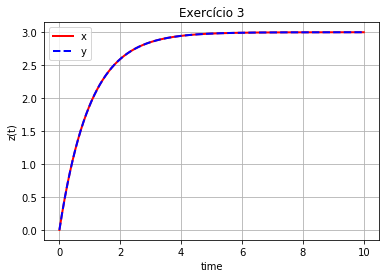

In [13]:
#return dy/dt
def model(z,t):
    dxdt = 3 * np.exp(-t)
    dydt = 3 - z[1]
    return [dxdt,dydt]

#initial condition
z0 = [0,0]

#time
t = np.linspace(0,10)

#solve
z = odeint(model, z0, t)

x = z[:,0]
y = z[:,1]

#plot results
plt.plot(t,x,'r-', linewidth=2,label='x')
plt.plot(t,y,'b--', linewidth=2,label='y')
plt.xlabel('time')
plt.ylabel('z(t)')
plt.title('Exercício 3')
plt.grid()
plt.legend()
plt.show()

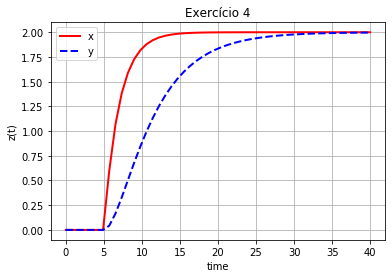

In [15]:
def step(t):
    if(t<5):
        return 0.0
    else:
        return 1.0
    
#return dy/dt
def model(z,t):
    x = z[0]
    y = z[1]
    
    dx = (-x+2*step(t))/2
    dy = (-y+x)/5
    
    return [dx,dy]

#initial condition
z0 = [0,0]

#time
t = np.linspace(0,40)

#solve
z = odeint(model, z0, t)

x = z[:,0]
y = z[:,1]

#plot results
plt.plot(t,x,'r-', linewidth=2,label='x')
plt.plot(t,y,'b--', linewidth=2,label='y')
plt.xlabel('time')
plt.ylabel('z(t)')
plt.title('Exercício 4')
plt.grid()
plt.legend()
plt.show()

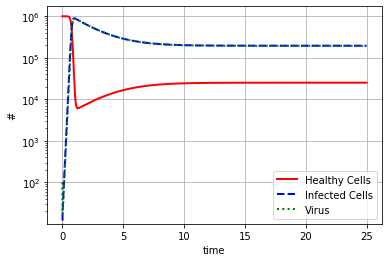

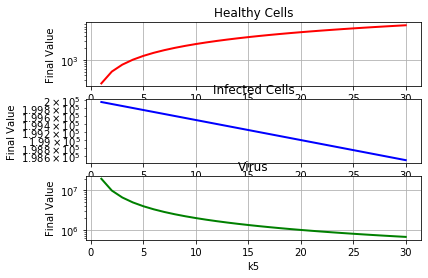

In [16]:
def hiv(x,t,k1,k2,k3,k4,k5,k6):
    H = x[0]
    I = x[1]
    V = x[2]

    dH = k1 - k2*H - k3*H*V
    dI = k3*H*V - k4*I
    dV = -k3*H*V - k5*V + k6*I

    return [dH,dI,dV]

#Initial condition
H0 = 1e6
I0 = 0.0
V0 = 100.0

#Constants
k1 = 1e5
k2 = 0.1
k3 = 2e-5
k4 = 0.5
k5 = 100
k6 = 100.0

#solve
t = np.linspace(0,25,1000)
z = odeint(hiv, [H0,I0,V0], t, args = (k1,k2,k3,k4,k5,k6,))

h = z[:,0]
i = z[:,1]
v = z[:,2]

#plot results
plt.semilogy(t,h,'r-', linewidth=2,label='Healthy Cells')
plt.semilogy(t,i,'b--', linewidth=2,label='Infected Cells')
plt.semilogy(t,v,'g:', linewidth=2,label='Virus')
plt.xlabel('time')
plt.ylabel('#')
plt.grid()
plt.legend()
plt.show()

#Multiple values of k5
N = 30
k5 = np.linspace(1,N,N)

H = np.zeros(N)
I = np.zeros(N)
V = np.zeros(N)

for i in range(0,len(k5)):
    z = odeint(hiv, [H0,I0,V0], t, args = (k1,k2,k3,k4,k5[i],k6,))
    H[i] = z[-1,0]
    I[i] = z[-1,1]
    V[i] = z[-1,2]

plt.subplot(3,1,1)
plt.semilogy(k5,H,'r-', linewidth=2)
plt.grid()
plt.xlabel('k5')
plt.ylabel('Final Value')
plt.title('Healthy Cells')

plt.subplot(3,1,2)
plt.grid()
plt.semilogy(k5,I,'b-', linewidth=2)
plt.xlabel('k5')
plt.ylabel('Final Value')
plt.title('Infected Cells')

plt.subplot(3,1,3)
plt.grid()
plt.semilogy(k5,V,'g-', linewidth=2)
plt.xlabel('k5')
plt.ylabel('Final Value')
plt.title('Virus')
plt.show()